In [188]:
# for data manipulation 
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,7))
plt.style.use("seaborn-bright")

#for Stats

import statsmodels.api as sm
from statsmodels.api import Logit

# import libraries for data preprocessinhg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# libraries for optimization and interpretation
import shap

# for warnings
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


<Figure size 864x504 with 0 Axes>

In [189]:
data=pd.read_csv('Transformed.csv')
data.head()

,Unnamed: 0,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,New_maritalstatus_Yes,CreditRating,Churn
0,0,-1.160580,-0.783685,-1.276518,-0.444774,-0.754292,-0.25613,-0.558645,-0.461939,-0.947937,...,0,0,0,1,0,0,0,0,3,1
1,1,-1.488361,-1.558803,-1.581047,-0.721787,-0.754292,-0.25613,0.029331,0.030061,-1.052171,...,0,0,0,1,0,0,0,1,2,1
2,2,-0.602404,-1.567202,-0.406192,-0.721787,-0.754292,-0.25613,0.037109,0.030061,-1.133754,...,1,0,0,0,0,0,0,1,2,0
3,3,0.406812,0.840653,0.957636,0.123980,-0.754292,-0.25613,0.662769,0.231433,0.956226,...,0,0,1,0,0,0,0,0,2,0
4,4,-1.481005,-1.600985,-1.581047,-0.721787,-0.754292,-0.25613,0.044890,0.025025,-1.133754,...,0,0,0,1,0,0,0,1,3,1


In [190]:
x=data.drop(columns=['Unnamed: 0','Churn'])

In [191]:
target=data['Churn']

### Removing non significant variables according to the stastical test.

In [192]:
data.columns

Index(['Unnamed: 0', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'Age', 'ChildrenInHH_Yes',
       'HandsetRefurbished_Yes', 'HandsetWebCapable_Yes', 'TruckOwner_Yes',
       'RVOwner_Yes', 'Homeownership_Unknown', 'BuysViaMailOrder_Yes',
       'RespondsToMailOffers_Yes', 'OptOutMailings_Yes', 'NonUSTravel_Yes',
       'OwnsComputer_Yes', 'HasCreditCard_Yes', 'NewCellphoneUser

In [193]:
insig=['RoamingCalls','PercChangeRevenues','CallForwardingCalls','TruckOwner_Yes','RVOwner_Yes','OptOutMailings_Yes',
      'NonUSTravel_Yes','OwnsComputer_Yes','HasCreditCard_Yes','NewCellphoneUser_Yes','OwnsMotorcycle_Yes','Occupation_Crafts',
       'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Professional','Occupation_Retired', 'Occupation_Self', 
       'Occupation_Student','New_maritalstatus_Yes']

In [194]:
x_cols=set(x.columns)
insig=set(insig)
x_final=x_cols.symmetric_difference(insig)
print('x_cols :',len(x_cols))
print('insig :',len(insig))
print('x_final:',len(x_final))

x_cols : 59
insig : 19
x_final: 40


In [195]:
x=x[list(x_final)]
x.head()

,HandsetRefurbished_Yes,CallWaitingCalls,ActiveSubs,MadeCallToRetentionTeam_Yes,RetentionCalls,RetentionOffersAccepted,CurrentEquipmentDays,RespondsToMailOffers_Yes,TotalRecurringCharge,ChildrenInHH_Yes,...,Handsets,OverageMinutes,UnansweredCalls,BlockedCalls,InboundCalls,ReferralsMadeBySubscriber,HandsetModels,MonthlyRevenue,DroppedCalls,PeakCallsInOut
0,0,-0.464100,-0.818300,1,0.070426,-0.883867,-0.073884,1,-1.276518,0,...,0.130266,-0.754292,-0.859058,-0.514034,-0.876154,-0.572264,0.343160,-1.160580,-0.947937,-0.378157
1,0,-0.610991,-0.818300,0,-0.787982,-0.883867,2.404823,1,-1.581047,1,...,0.130266,-0.754292,-1.060799,-0.684813,-0.876154,-0.572264,-0.998903,-1.488361,-1.052171,-1.283919
2,0,-0.610991,-0.818300,0,-0.787982,-0.883867,2.811137,0,-0.406192,1,...,-0.963680,-0.754292,-1.224658,-0.684813,-0.876154,-0.572264,-0.998903,-0.602404,-1.133754,-1.361552
3,0,0.351607,0.508156,0,-0.787982,-0.883867,0.286876,1,0.957636,0,...,1.024514,-0.754292,0.627948,0.207226,0.636395,-0.572264,0.832384,0.406812,0.956226,1.328215
4,0,-0.610991,0.508156,0,-0.787982,-0.883867,1.306178,1,-1.581047,0,...,0.700396,-0.754292,-1.224658,-0.684813,-0.876154,-0.572264,0.680032,-1.481005,-1.133754,-1.389289


In [196]:
x.shape

(50679, 40)

In [21]:
xc=sm.add_constant(x)

In [22]:
model=sm.Logit(target,xc)
result=model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.580075
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.031     
Dependent Variable:         Churn                   AIC:                     58877.1923
Date:                       2023-01-22 13:17        BIC:                     59239.3562
No. Observations:           50679                   Log-Likelihood:          -29398.   
Df Model:                   40                      LL-Null:                 -30341.   
Df Residuals:               50638                   LLR p-value:             0.0000    
Converged:                  0.0000                  Scale:                   1.0000    
---------------------------------------------------------------------------------------
                             Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
-----------------------

### fitting all models

In [23]:
clf = {
    'logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'NaiveBayes':GaussianNB()
}

model_score = pd.DataFrame(columns=['model name','precission score','recall score','acurracy score','f1 score'])

for clf_name,clf in list(zip(clf.keys(),clf.values())):
    print('fitting model .....',clf_name)
    clf.fit(x,target)
    y_pred=clf.predict(x)
    t={
        'model name':clf_name,
        'precission score': precision_score(target,y_pred),
        'recall score':recall_score(target,y_pred),
        'acurracy score':accuracy_score(target,y_pred),
        'f1 score':f1_score(target,y_pred),
        'roc_auc_score':roc_auc_score(target,y_pred)
    }
    model_score=model_score.append(t,ignore_index=True)
model_score=model_score.sort_values(by='roc_auc_score',ascending=False)
model_score

fitting model ..... logistic regression
fitting model ..... KNN
fitting model ..... RandomForest
fitting model ..... DecisionTree
fitting model ..... XGBoost
fitting model ..... AdaBoost
fitting model ..... NaiveBayes


,model name,precission score,recall score,acurracy score,f1 score,roc_auc_score
2,RandomForest,1.0,1.0,1.0,1.0,1.000000
3,DecisionTree,1.0,1.0,1.0,1.0,1.000000
4,XGBoost,0.872739,0.372613,0.804909,0.522252,0.675415
1,KNN,0.686466,0.357788,0.769451,0.470402,0.646137
6,NaiveBayes,0.399046,0.184651,0.687089,0.252475,0.536584
5,AdaBoost,0.564292,0.089568,0.719667,0.154597,0.530921
0,logistic regression,0.490741,0.029235,0.713511,0.055183,0.508536


In [24]:
 from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5,shuffle=True, random_state=0)

In [25]:

clf = {
    'logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'NaiveBayes':GaussianNB()
}

model_score = pd.DataFrame(columns=['model name','recall scores','recall score','variance','roc_auc scores','roc_auc','roc_auc_variance'])

for clf_name,clf in list(zip(clf.keys(),clf.values())):
    print('fitting model .....',clf_name)
    clf.fit(x,target)
    cv=cross_val_score(estimator=clf,X=x,y=target,cv=kf,scoring='recall')
    cv_auc=cross_val_score(estimator=clf,X=x,y=target,cv=kf,scoring='roc_auc')
    t={
        'model name':clf_name,
        'recall scores':cv,
        'recall score':np.mean(cv ),
        'variance':np.std(cv,ddof=1),
        'roc_auc scores':cv_auc,
        'roc_auc':np.mean(cv_auc),
        'roc_auc_variance':np.std(cv_auc,ddof=1)
    }
    model_score=model_score.append(t,ignore_index=True)
model_score=model_score.sort_values(by='recall score',ascending=False)
model_score

fitting model ..... logistic regression
fitting model ..... KNN
fitting model ..... RandomForest
fitting model ..... DecisionTree
fitting model ..... XGBoost
fitting model ..... AdaBoost
fitting model ..... NaiveBayes


,model name,recall scores,recall score,variance,roc_auc scores,roc_auc,roc_auc_variance
3,DecisionTree,"[0.36360555743815653, 0.36341632088520054, 0.3...",0.360659,0.005866,"[0.539447038817975, 0.545777093724916, 0.54452...",0.542372,0.003459
4,XGBoost,"[0.1860386309725517, 0.19674965421853388, 0.17...",0.190268,0.007119,"[0.6528660536854921, 0.6618439126041641, 0.659...",0.6592,0.003934
6,NaiveBayes,"[0.1907827854964419, 0.19156293222683266, 0.17...",0.185234,0.006795,"[0.5701295834751179, 0.5879707143528139, 0.584...",0.580028,0.006751
1,KNN,"[0.17519484920365977, 0.17669432918395575, 0.1...",0.181147,0.009853,"[0.5594370543512018, 0.5638948683051859, 0.561...",0.565131,0.005513
5,AdaBoost,"[0.09589969501863775, 0.08575380359612725, 0.0...",0.090399,0.008143,"[0.6526139423622248, 0.6604731019824295, 0.657...",0.659015,0.004228
2,RandomForest,"[0.08708912233141308, 0.07918395573997233, 0.0...",0.083691,0.006398,"[0.654833729386993, 0.6613584390534867, 0.6530...",0.657401,0.003419
0,logistic regression,"[0.027787190782785496, 0.02731673582295989, 0....",0.029182,0.001905,"[0.6212001310195969, 0.6261303292542195, 0.614...",0.620919,0.004365


### Bulding Random Forest model using the significant variables.

In [197]:
from sklearn.model_selection import train_test_split

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True, random_state=0)

In [198]:
xtrain,xtest,ytrain,ytest=train_test_split(x,target,test_size=0.3,random_state=0)

In [159]:
from sklearn.metrics import precision_score, make_scorer
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label=0)

In [160]:
grid={'n_estimators':range(10,100,10)}
rnd=RandomForestClassifier(random_state=0)

In [161]:
grid_model=GridSearchCV( estimator=rnd,
    param_grid=grid,scoring=custom_scorer,
    cv=kf)

In [162]:
forest_model=grid_model.fit(xtrain,ytrain)
print('Best parameters for random forest classifier: ', forest_model.best_params_, '\n')

Best parameters for random forest classifier:  {'n_estimators': 20} 



In [181]:
 final_forest=RandomForestClassifier(n_estimators=20,random_state=0)

In [182]:
final_model=final_forest.fit(xtrain,ytrain)

In [183]:
train_predict=final_model.predict(xtrain)

In [184]:
print(classification_report(ytrain,train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25403
           1       1.00      0.98      0.99     10072

    accuracy                           0.99     35475
   macro avg       1.00      0.99      0.99     35475
weighted avg       0.99      0.99      0.99     35475



In [185]:
test_predict=final_model.predict(xtest)

In [186]:
print(classification_report(ytest,test_predict))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82     10773
           1       0.48      0.12      0.19      4431

    accuracy                           0.71     15204
   macro avg       0.60      0.53      0.51     15204
weighted avg       0.65      0.71      0.64     15204



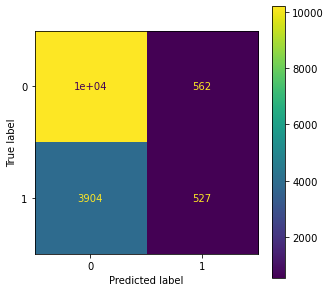

In [187]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize']=[5,5]
ConfusionMatrixDisplay.from_predictions(ytest,test_predict)

Observations:-
* Accuracy - 71%
* Recall score 1 - 0.12
